In [11]:
import os
import math
import re
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')

<font size = 5> (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [2]:
columns = ['ID Number', 'Diagnostic']

feature_list = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'ConcavePoint', 'Symmetry', 'FractalDimenension']

for n in range(1,4):
    for fl in feature_list:
        columns.append(fl +'' + str(n))

df = pd.read_csv('wdbc.data', header=None)
df.columns = columns
df = df.replace("B", 0) 
df = df.replace("M", 1)
df['Diagnostic'] = df['Diagnostic'].astype(int)

df.head()

,ID Number,Diagnostic,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoint1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoint3,Symmetry3,FractalDimenension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
M_df = df[df.Diagnostic == 1]
B_df = df[df.Diagnostic == 0]
M_train_df, M_test_df = train_test_split(M_df, test_size = 0.2)
B_train_df, B_test_df = train_test_split(B_df, test_size = 0.2)
train_df = pd.concat([M_train_df, B_train_df], axis=0)
test_df = pd.concat([M_test_df, B_test_df], axis=0)
train_df.count()

ID Number              454
Diagnostic             454
Radius1                454
Texture1               454
Perimeter1             454
Area1                  454
Smoothness1            454
Compactness1           454
Concavity1             454
ConcavePoint1          454
Symmetry1              454
FractalDimenension1    454
Radius2                454
Texture2               454
Perimeter2             454
Area2                  454
Smoothness2            454
Compactness2           454
Concavity2             454
ConcavePoint2          454
Symmetry2              454
FractalDimenension2    454
Radius3                454
Texture3               454
Perimeter3             454
Area3                  454
Smoothness3            454
Compactness3           454
Concavity3             454
ConcavePoint3          454
Symmetry3              454
FractalDimenension3    454
dtype: int64

In [4]:
test_df.count()

ID Number              115
Diagnostic             115
Radius1                115
Texture1               115
Perimeter1             115
Area1                  115
Smoothness1            115
Compactness1           115
Concavity1             115
ConcavePoint1          115
Symmetry1              115
FractalDimenension1    115
Radius2                115
Texture2               115
Perimeter2             115
Area2                  115
Smoothness2            115
Compactness2           115
Concavity2             115
ConcavePoint2          115
Symmetry2              115
FractalDimenension2    115
Radius3                115
Texture3               115
Perimeter3             115
Area3                  115
Smoothness3            115
Compactness3           115
Concavity3             115
ConcavePoint3          115
Symmetry3              115
FractalDimenension3    115
dtype: int64

In [34]:
def confusionMatrix_roc(y_true, y_pred, y_scores):
    mat = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    true_positive_rate = tp / (tp + fn)
    true_negative_rate = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2* ((precision * recall) / (precision + recall))
    
    sns.set(font_scale=1.4)
    sns.heatmap(mat,square= True, annot=True, cbar= False, fmt='g',cmap=ListedColormap(['white']))
    plt.xlabel("Predicted B     Predicted M")
    plt.ylabel("Actual M     Actual B")
    print('Confusion Matrix:')
    print(mat)
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], color='black',  linestyle=':')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.show()

In [35]:
def confusionMatrix_roc_cluster(y_true, y_pred):
    mat = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    true_positive_rate = tp / (tp + fn)
    true_negative_rate = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2* ((precision * recall) / (precision + recall))
    
    sns.set(font_scale=1.4)
    sns.heatmap(mat,square= True, annot=True, cbar= False, fmt='g',cmap=ListedColormap(['white']))
    plt.xlabel("Predicted B     Predicted M")
    plt.ylabel("Actual M     Actual B")
    print('Confusion Matrix:')
    print(mat)
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], color='black',  linestyle=':')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.show()

<font size = 5>(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.
    
i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

# 1  Iteration :
Best Penalty Parameter is: {'C': 5.994842503189409}
Train:  {'accuracy': 0.9889867841409692, 'precision': 0.9939759036144579, 'recall': 0.9763313609467456, 'f1': 0.9850746268656716, 'auc': 0.9864112945084604}
Test:  {'accuracy': 0.808695652173913, 'precision': 0.6615384615384615, 'recall': 1.0, 'f1': 0.7962962962962964, 'auc': 0.8472222222222222}

 Confusion Matrix, ROC for Training at iteration 1:
Confusion Matrix:
[[284   1]
 [  4 165]]


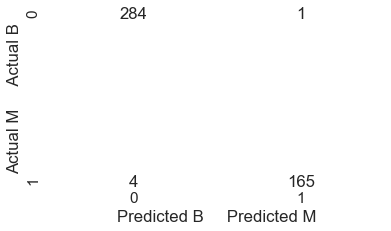

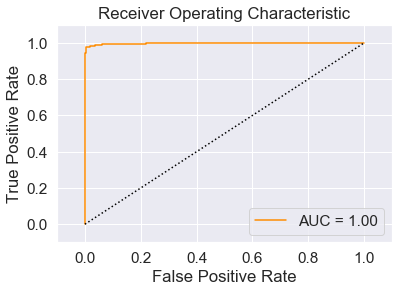


 Confusion Matrix, ROC for Testing at iteration 1:
Confusion Matrix:
[[50 22]
 [ 0 43]]


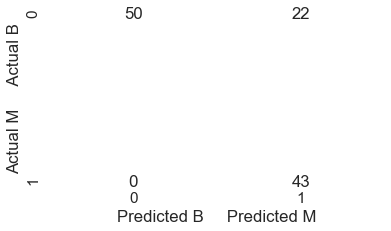

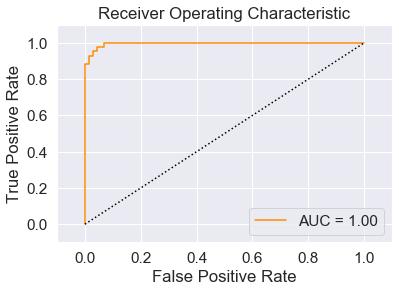

# 2  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.973568281938326, 'precision': 0.9937106918238994, 'recall': 0.9349112426035503, 'f1': 0.9634146341463414, 'auc': 0.9657012353368628}
Test:  {'accuracy': 0.9739130434782609, 'precision': 0.9347826086956522, 'recall': 1.0, 'f1': 0.9662921348314606, 'auc': 0.9791666666666667}
# 3  Iteration :
Best Penalty Parameter is: {'C': 4641.588833612773}
Train:  {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'auc': 1.0}
Test:  {'accuracy': 0.9304347826086956, 'precision': 1.0, 'recall': 0.813953488372093, 'f1': 0.8974358974358974, 'auc': 0.9069767441860466}
# 4  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9757709251101322, 'precision': 0.99375, 'recall': 0.9408284023668639, 'f1': 0.966565349544073, 'auc': 0.9686598152185197}
Test:  {'accuracy': 0.9565217391304348, 'precision': 1.0, 'recall': 0.8837209302325582, 'f1': 0.9382716049382717, 'auc': 0.94

# 25  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.973568281938326, 'precision': 0.9875776397515528, 'recall': 0.9408284023668639, 'f1': 0.9636363636363637, 'auc': 0.9669054292536075}
Test:  {'accuracy': 0.9565217391304348, 'precision': 1.0, 'recall': 0.8837209302325582, 'f1': 0.9382716049382717, 'auc': 0.9418604651162791}
# 26  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9757709251101322, 'precision': 0.99375, 'recall': 0.9408284023668639, 'f1': 0.966565349544073, 'auc': 0.9686598152185197}
Test:  {'accuracy': 0.9304347826086956, 'precision': 0.8571428571428571, 'recall': 0.9767441860465116, 'f1': 0.9130434782608695, 'auc': 0.9397609819121446}
# 27  Iteration :
Best Penalty Parameter is: {'C': 5.994842503189409}
Train:  {'accuracy': 0.9889867841409692, 'precision': 0.9939759036144579, 'recall': 0.9763313609467456, 'f1': 0.9850746268656716, 'auc': 0.9864112945084604}
Test:  {'accuracy': 0.669565217

In [36]:
s_train_list = []
s_test_list = []

for i in range (1,31):
    
    M_train_df, M_test_df = train_test_split(M_df, test_size = 0.2)
    B_train_df, B_test_df = train_test_split(B_df, test_size = 0.2)

    train_df = pd.concat([M_train_df, B_train_df], axis=0)
    test_df = pd.concat([M_test_df, B_test_df], axis=0)
    X_train = train_df.iloc[:,2:]
    y_train = train_df.iloc[:,1]
    X_test = test_df.iloc[:,2:]
    y_test = test_df.iloc[:,1]
    
    min_max_scaler = preprocessing.MinMaxScaler()
    values_scaled = min_max_scaler.fit_transform(X_train.values)
    X_train = pd.DataFrame(values_scaled)
    X_train.columns = columns[2:]

    values_scaled = min_max_scaler.fit_transform(X_test.values)
    X_test = pd.DataFrame(values_scaled)
    X_test.columns = columns[2:]
    
    param = {'C': np.logspace(-5, 8, 10)}
    supervised_svc_model = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000)
    grid = GridSearchCV(supervised_svc_model, param_grid=param, cv=5)
    grid.fit(X_train, y_train)
    
    y_train_pred = grid.predict(X_train)
    y_train_scores = grid.decision_function(X_train)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train,y_train_pred)
    
    s_train_list.append({'accuracy':train_accuracy, 'precision':train_precision, 'recall':train_recall, \
                         'f1':train_f1, 'auc':train_auc})
    print('# %d  Iteration :' %(i))
    print('Best Penalty Parameter is:', grid.best_params_)
    print('Train: ', s_train_list[i-1])
    
    y_test_pred = grid.predict(X_test)
    y_test_scores = grid.decision_function(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    s_test_list.append({'accuracy':test_accuracy, 'precision':test_precision, 'recall':test_recall, \
                         'f1':test_f1, 'auc':test_auc})
    
    print('Test: ', s_test_list[i-1])
    
    if i == 1:
        print('\n Confusion Matrix, ROC for Training at iteration 1:')
        confusionMatrix_roc(y_train, y_train_pred, y_train_scores)
        print('\n Confusion Matrix, ROC for Testing at iteration 1:')
        confusionMatrix_roc(y_test, y_test_pred, y_test_scores)

    

    
    

In [25]:
s_test_dt = pd.DataFrame(s_test_list) 
s_trian_dt = pd.DataFrame(s_train_list) 

print('Average scores for supervised learning in Training set: \n')
print(s_trian_dt.describe().loc[['mean']])
print('\n Average scores for supervised learning in Testing set: \n')
print(s_test_dt.describe().loc[['mean']])

Average scores for supervised learning in Training set: 

      accuracy       auc        f1  precision    recall
mean  0.982599  0.978273  0.976105   0.991616  0.961341

 Average scores for supervised learning in Testing set: 

      accuracy       auc        f1  precision    recall
mean  0.916232  0.925452  0.899667   0.856581  0.962016


<font size = 5>ii. Semi-Supervised Learning / Self-training

# 1  Iteration :
Best Penalty Parameter is: {'C': 166.81005372000593}
Train:  {'accuracy': 0.973568281938326, 'precision': 0.9875776397515528, 'recall': 0.9408284023668639, 'f1': 0.9636363636363637, 'auc': 0.9669054292536075}
Test:  {'accuracy': 0.9478260869565217, 'precision': 0.9743589743589743, 'recall': 0.8837209302325582, 'f1': 0.9268292682926831, 'auc': 0.9349160206718348}

 Confusion Matrix, ROC for Training at iteration 1:
Confusion Matrix:
[[283   2]
 [ 10 159]]


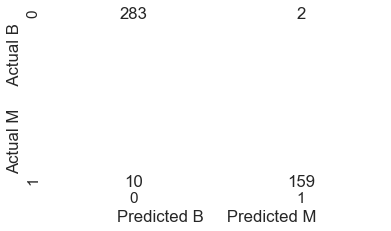

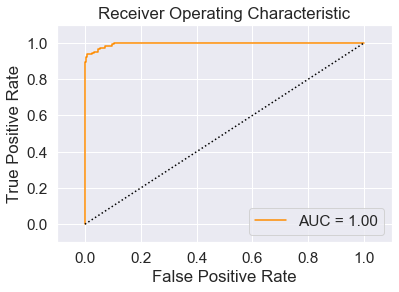


 Confusion Matrix, ROC for Testing at iteration 1:
Confusion Matrix:
[[71  1]
 [ 5 38]]


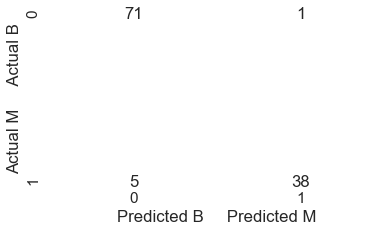

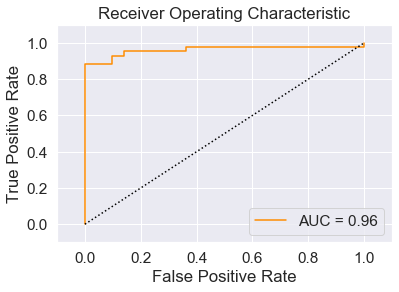

# 2  Iteration :
Best Penalty Parameter is: {'C': 5.994842503189409}
Train:  {'accuracy': 0.9823788546255506, 'precision': 1.0, 'recall': 0.9526627218934911, 'f1': 0.9757575757575757, 'auc': 0.9763313609467456}
Test:  {'accuracy': 0.7913043478260869, 'precision': 0.6461538461538462, 'recall': 0.9767441860465116, 'f1': 0.7777777777777778, 'auc': 0.8286498708010336}
# 3  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9647577092511013, 'precision': 0.9935483870967742, 'recall': 0.9112426035502958, 'f1': 0.9506172839506174, 'auc': 0.9538669158102356}
Test:  {'accuracy': 0.9826086956521739, 'precision': 0.9767441860465116, 'recall': 0.9767441860465116, 'f1': 0.9767441860465116, 'auc': 0.9814276485788114}
# 4  Iteration :
Best Penalty Parameter is: {'C': 5.994842503189409}
Train:  {'accuracy': 0.9779735682819384, 'precision': 0.9704142011834319, 'recall': 0.9704142011834319, 'f1': 0.9704142011834319, 'auc': 0.9764351707671546}
Test:  {'accuracy': 0.8

# 25  Iteration :
Best Penalty Parameter is: {'C': 5.994842503189409}
Train:  {'accuracy': 0.9801762114537445, 'precision': 1.0, 'recall': 0.9467455621301775, 'f1': 0.9726443768996961, 'auc': 0.9733727810650887}
Test:  {'accuracy': 0.9304347826086956, 'precision': 0.972972972972973, 'recall': 0.8372093023255814, 'f1': 0.9, 'auc': 0.9116602067183464}
# 26  Iteration :
Best Penalty Parameter is: {'C': 5.994842503189409}
Train:  {'accuracy': 0.9757709251101322, 'precision': 0.9702380952380952, 'recall': 0.9644970414201184, 'f1': 0.967359050445104, 'auc': 0.9734765908854978}
Test:  {'accuracy': 0.9826086956521739, 'precision': 0.9555555555555556, 'recall': 1.0, 'f1': 0.9772727272727273, 'auc': 0.986111111111111}
# 27  Iteration :
Best Penalty Parameter is: {'C': 5.994842503189409}
Train:  {'accuracy': 0.9779735682819384, 'precision': 0.9877300613496932, 'recall': 0.9526627218934911, 'f1': 0.9698795180722891, 'auc': 0.972822589016921}
Test:  {'accuracy': 0.9652173913043478, 'precision': 0.9

In [37]:
s_train_list = []
s_test_list = []

for i in range (1,31):
    
    M_train_df, M_test_df = train_test_split(M_df, test_size = 0.2)
    B_train_df, B_test_df = train_test_split(B_df, test_size = 0.2)

    train_df = pd.concat([M_train_df, B_train_df], axis=0).reset_index(drop=True)
    test_df = pd.concat([M_test_df, B_test_df], axis=0)
    X_train = train_df.iloc[:,2:]
    y_train = train_df.iloc[:,1]
    X_test = test_df.iloc[:,2:]
    y_test = test_df.iloc[:,1]
    
    min_max_scaler = preprocessing.MinMaxScaler()
    values_scaled = min_max_scaler.fit_transform(X_train.values)
    X_train = pd.DataFrame(values_scaled)
    X_train.columns = columns[2:]

    values_scaled = min_max_scaler.fit_transform(X_test.values)
    X_test = pd.DataFrame(values_scaled)
    X_test.columns = columns[2:]
    
    scaled_train_df = X_train.copy()
    scaled_train_df['Diagnostic'] = y_train
    scaled_train_df['ID Number'] = train_df['ID Number']
    scaled_train_df = scaled_train_df.reindex(columns=columns) 
    
    M_label_df, M_unlabel_df = train_test_split(scaled_train_df[train_df.Diagnostic == 1], test_size = 0.5)
    B_label_df, B_unlabel_df = train_test_split(scaled_train_df[train_df.Diagnostic == 0], test_size = 0.5)

    train_label_df = pd.concat([M_label_df, B_label_df], axis=0)
    train_unlabel_df = pd.concat([M_unlabel_df, B_unlabel_df], axis=0)
    X_train_label = train_label_df.iloc[:,2:]
    y_train_label = train_label_df.iloc[:,1]
    
    param = {'C': np.logspace(-5, 8, 10)}
    ssupervised_svc_model = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000)
    grid = GridSearchCV(ssupervised_svc_model, param_grid=param, cv=5)
    grid.fit(X_train_label, y_train_label)
    
    while train_unlabel_df.shape[0] != 0:
            
        train_unlabel_df['Diagnostic'] = grid.predict(train_unlabel_df.iloc[:,2:]) 
        train_unlabel_df['Distance'] = np.abs(grid.decision_function(train_unlabel_df.iloc[:,2:]))
        train_unlabel_df = train_unlabel_df.sort_values(by=['Distance'], ascending=False) 

        selected = train_unlabel_df.iloc[0,:-1].to_frame().transpose()
        train_unlabel_df = train_unlabel_df.iloc[1:,:-1]
        train_label_df = pd.concat([train_label_df, selected], axis=0)

        X_train_label = train_label_df.iloc[:,2:]
        y_train_label = train_label_df.iloc[:,1]
        grid.fit(X_train_label, y_train_label) # Retrain SVM
    
    y_train_pred = grid.predict(X_train)
    y_train_scores = grid.decision_function(X_train)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train,y_train_pred)
    
    s_train_list.append({'accuracy':train_accuracy, 'precision':train_precision, 'recall':train_recall, \
                         'f1':train_f1, 'auc':train_auc})
    print('# %d  Iteration :' %(i))
    print('Best Penalty Parameter is:', grid.best_params_)
    print('Train: ', s_train_list[i-1])
    
    y_test_pred = grid.predict(X_test)
    y_test_scores = grid.decision_function(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    s_test_list.append({'accuracy':test_accuracy, 'precision':test_precision, 'recall':test_recall, \
                         'f1':test_f1, 'auc':test_auc})
    
    print('Test: ', s_test_list[i-1])
    
    if i == 1:
        print('\n Confusion Matrix, ROC for Training at iteration 1:')
        confusionMatrix_roc(y_train, y_train_pred, y_train_scores)
        print('\n Confusion Matrix, ROC for Testing at iteration 1:')
        confusionMatrix_roc(y_test, y_test_pred, y_test_scores)

    

    
    

In [28]:
ss_test_dt = pd.DataFrame(s_test_list) 
ss_trian_dt = pd.DataFrame(s_train_list) 

print('Average scores for semi-supervised learning in Training set: \n')
print(ss_trian_dt.describe().loc[['mean']])
print('\n Average scores for semi-supervised learning in Testing set: \n')
print(ss_test_dt.describe().loc[['mean']])

Average scores for semi-supervised learning in Training set: 

      accuracy       auc        f1  precision    recall
mean  0.975404  0.970535  0.966277   0.982197  0.951479

 Average scores for semi-supervised learning in Testing set: 

      accuracy       auc        f1  precision    recall
mean  0.884928  0.895925  0.866319   0.821064  0.939535


<font size = 5 >iii. Unsupervised Learning (K-Means)

## The method I choose to avoid the local solution is to run the K-Means several times and use the lowest result. Also, the default parameter in KMeans libray of the nn_init is 10, I decided to increase it to 85, it will lead to the best output of 85 runs instead of 10, by running k to the n times and choosing among them will give us the guarantee to have the global minimum, but it will be extremely time consuming, so the method of increasing n_int parameter will be the better approach in my opinion.

In [46]:
def distance_cluster_1(row):
#     print(row.iloc[2:].tolist())
    return distance.euclidean(kmeans.cluster_centers_[0], row.iloc[2:].tolist())

def distance_cluster_2(row):
    return distance.euclidean(kmeans.cluster_centers_[1], row.iloc[2:-1].tolist())

# 1  Iteration :
Train:  {'accuracy': 0.8612334801762115, 'precision': 0.9907407407407407, 'recall': 0.6331360946745562, 'f1': 0.7725631768953068, 'auc': 0.8148136613723658}
Test:  {'accuracy': 0.8260869565217391, 'precision': 1.0, 'recall': 0.5348837209302325, 'f1': 0.6969696969696969, 'auc': 0.7674418604651163}

 Confusion Matrix, ROC for Training at iteration 1:
Confusion Matrix:
[[284   1]
 [ 62 107]]


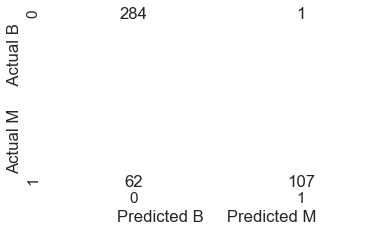

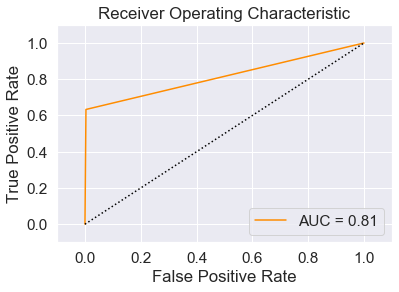


 Confusion Matrix, ROC for Testing at iteration 1:
Confusion Matrix:
[[72  0]
 [20 23]]


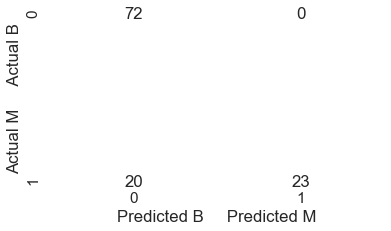

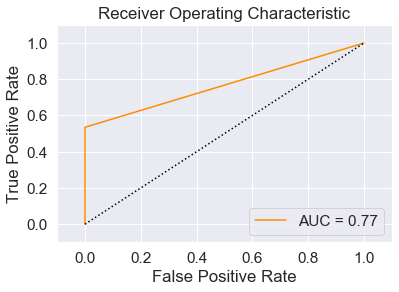

# 2  Iteration :
Train:  {'accuracy': 0.8546255506607929, 'precision': 0.9904761904761905, 'recall': 0.6153846153846154, 'f1': 0.759124087591241, 'auc': 0.8059379217273954}
Test:  {'accuracy': 0.8521739130434782, 'precision': 1.0, 'recall': 0.6046511627906976, 'f1': 0.7536231884057971, 'auc': 0.8023255813953488}
# 3  Iteration :
Train:  {'accuracy': 0.8480176211453745, 'precision': 0.9901960784313726, 'recall': 0.5976331360946746, 'f1': 0.7453874538745388, 'auc': 0.7970621820824251}
Test:  {'accuracy': 0.8695652173913043, 'precision': 1.0, 'recall': 0.6511627906976745, 'f1': 0.7887323943661972, 'auc': 0.8255813953488372}
# 4  Iteration :
Train:  {'accuracy': 0.8392070484581498, 'precision': 0.9897959183673469, 'recall': 0.5739644970414202, 'f1': 0.7265917602996255, 'auc': 0.7852278625557978}
Test:  {'accuracy': 0.8608695652173913, 'precision': 1.0, 'recall': 0.627906976744186, 'f1': 0.7714285714285715, 'auc': 0.813953488372093}
# 5  Iteration :
Train:  {'accuracy': 0.8546255506607929, 

# 29  Iteration :
Train:  {'accuracy': 0.8502202643171806, 'precision': 0.9902912621359223, 'recall': 0.6035502958579881, 'f1': 0.7499999999999999, 'auc': 0.8000207619640818}
Test:  {'accuracy': 0.8695652173913043, 'precision': 1.0, 'recall': 0.6511627906976745, 'f1': 0.7887323943661972, 'auc': 0.8255813953488372}
# 30  Iteration :
Train:  {'accuracy': 0.8546255506607929, 'precision': 0.9904761904761905, 'recall': 0.6153846153846154, 'f1': 0.759124087591241, 'auc': 0.8059379217273954}
Test:  {'accuracy': 0.8434782608695652, 'precision': 1.0, 'recall': 0.5813953488372093, 'f1': 0.7352941176470588, 'auc': 0.7906976744186047}


In [49]:
us_train_list = []
us_test_list = []

for i in range (1,31):
    
    M_train_df, M_test_df = train_test_split(M_df, test_size = 0.2)
    B_train_df, B_test_df = train_test_split(B_df, test_size = 0.2)
   
    train_df = pd.concat([M_train_df, B_train_df], axis=0)
    test_df = pd.concat([M_test_df, B_test_df], axis=0)
    X_train = train_df.iloc[:,2:]
    y_train = train_df.iloc[:,1]
    X_test = test_df.iloc[:,2:]
    y_test = test_df.iloc[:,1]
    
    kmeans = KMeans(n_clusters=2,init='random',n_init=85)
    kmeans.fit(train_df.iloc[:,2:])  
    k_labels = kmeans.labels_
    
    centroid_df = train_df.copy()
    centroid_df['dst_1'] = centroid_df.apply(distance_cluster_1, axis=1)
    centroid_df['dst_2'] = centroid_df.apply(distance_cluster_2, axis=1)
    ## 30 closest points
    clabel_1 = centroid_df.sort_values(by='dst_1').iloc[:30, [1]]['Diagnostic'].value_counts().index[0]
    clabel_2 = centroid_df.sort_values(by='dst_2').iloc[:30, [1]]['Diagnostic'].value_counts().index[0]
    
    ## determind the pred base on cluster - train
    cluster_train_df = train_df.copy()
    cluster_train_df['cluster'] = kmeans.labels_
    cluster_train_df['Pred Diagnostic'] = cluster_train_df.apply(lambda x: clabel_1 if x['cluster'] == 0 \
                                                               else clabel_2, axis=1)
    ## prepare training and validating data
    y_train = cluster_train_df['Diagnostic']
    y_train_pred = cluster_train_df['Pred Diagnostic']
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train,y_train_pred)
    
    us_train_list.append({'accuracy':train_accuracy, 'precision':train_precision, 'recall':train_recall, \
                         'f1':train_f1, 'auc':train_auc})
    print('# %d  Iteration :' %(i))
    print('Train: ', us_train_list[i-1])
    
    ## determind distance between test datapoint
    cluster_test_df = test_df.copy()
    cluster_test_df['dst_1'] = cluster_test_df.apply(distance_cluster_1, axis=1)
    cluster_test_df['dst_2'] = cluster_test_df.apply(distance_cluster_2, axis=1)

    #Classify
    cluster_test_df['Pred Diagnostic'] = cluster_test_df.apply(lambda x: clabel_1 if x['dst_1'] < x['dst_2'] \
                                                               else clabel_2, axis=1)
    
    ## prepare testing and validating data
    y_test = cluster_test_df['Diagnostic']
    y_test_pred = cluster_test_df['Pred Diagnostic']
    

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    us_test_list.append({'accuracy':test_accuracy, 'precision':test_precision, 'recall':test_recall, \
                         'f1':test_f1, 'auc':test_auc})
    
    print('Test: ', us_test_list[i-1])
    
    if i == 1:
        print('\n Confusion Matrix, ROC for Training at iteration 1:')
        confusionMatrix_roc_cluster(y_train, y_train_pred)
        print('\n Confusion Matrix, ROC for Testing at iteration 1:')
        confusionMatrix_roc_cluster(y_test, y_test_pred)

    

    
    

In [50]:
us_test_dt = pd.DataFrame(us_test_list) 
us_trian_dt = pd.DataFrame(us_train_list) 

print('Average scores for semi-supervised learning in Training set: \n')
print(us_trian_dt.describe().loc[['mean']])
print('\n Average scores for semi-supervised learning in Testing set: \n')
print(us_test_dt.describe().loc[['mean']])

Average scores for semi-supervised learning in Training set: 

      accuracy       auc        f1  precision    recall
mean  0.851762  0.801771  0.752523   0.992908  0.606114

 Average scores for semi-supervised learning in Testing set: 

      accuracy      auc        f1  precision    recall
mean  0.846667  0.79621  0.742752   0.990281  0.596124


<font size = 5>iv. Spectral Clustering

# 1  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.973568281938326, 'precision': 0.9875776397515528, 'recall': 0.9408284023668639, 'f1': 0.9636363636363637, 'auc': 0.9669054292536075}
Test:  {'accuracy': 0.9478260869565217, 'precision': 0.9743589743589743, 'recall': 0.8837209302325582, 'f1': 0.9268292682926831, 'auc': 0.9349160206718348}

 Confusion Matrix, ROC for Training at iteration 1:
Confusion Matrix:
[[282   3]
 [ 62 107]]


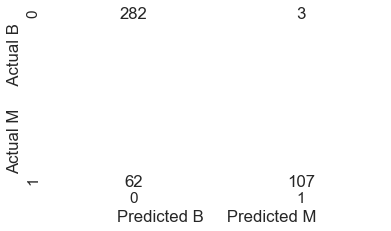

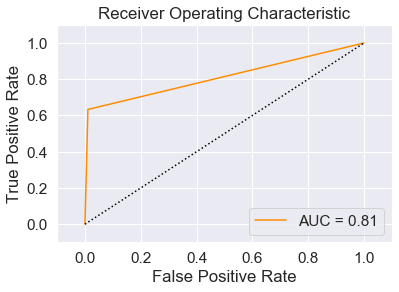


 Confusion Matrix, ROC for Testing at iteration 1:
Confusion Matrix:
[[72  0]
 [12 31]]


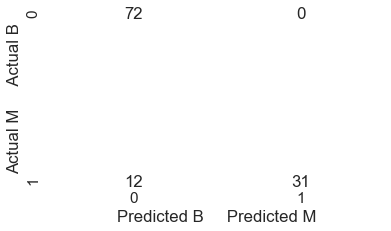

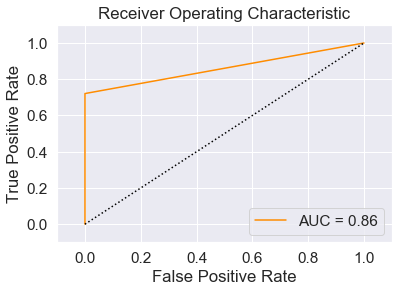

# 2  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9823788546255506, 'precision': 1.0, 'recall': 0.9526627218934911, 'f1': 0.9757575757575757, 'auc': 0.9763313609467456}
Test:  {'accuracy': 0.7913043478260869, 'precision': 0.6461538461538462, 'recall': 0.9767441860465116, 'f1': 0.7777777777777778, 'auc': 0.8286498708010336}
# 3  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9647577092511013, 'precision': 0.9935483870967742, 'recall': 0.9112426035502958, 'f1': 0.9506172839506174, 'auc': 0.9538669158102356}
Test:  {'accuracy': 0.9826086956521739, 'precision': 0.9767441860465116, 'recall': 0.9767441860465116, 'f1': 0.9767441860465116, 'auc': 0.9814276485788114}
# 4  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9779735682819384, 'precision': 0.9704142011834319, 'recall': 0.9704142011834319, 'f1': 0.9704142011834319, 'auc': 0.9764351707671546}
Test:  {'accuracy':

# 25  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9801762114537445, 'precision': 1.0, 'recall': 0.9467455621301775, 'f1': 0.9726443768996961, 'auc': 0.9733727810650887}
Test:  {'accuracy': 0.9304347826086956, 'precision': 0.972972972972973, 'recall': 0.8372093023255814, 'f1': 0.9, 'auc': 0.9116602067183464}
# 26  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9757709251101322, 'precision': 0.9702380952380952, 'recall': 0.9644970414201184, 'f1': 0.967359050445104, 'auc': 0.9734765908854978}
Test:  {'accuracy': 0.9826086956521739, 'precision': 0.9555555555555556, 'recall': 1.0, 'f1': 0.9772727272727273, 'auc': 0.986111111111111}
# 27  Iteration :
Best Penalty Parameter is: {'C': 0.21544346900318823}
Train:  {'accuracy': 0.9779735682819384, 'precision': 0.9877300613496932, 'recall': 0.9526627218934911, 'f1': 0.9698795180722891, 'auc': 0.972822589016921}
Test:  {'accuracy': 0.9652173913043478, 'precision

In [60]:
sc_train_list = []
sc_test_list = []

for x in range (1,31):
    
    M_train_df, M_test_df = train_test_split(M_df, test_size = 0.2)
    B_train_df, B_test_df = train_test_split(B_df, test_size = 0.2)

    train_df = pd.concat([M_train_df, B_train_df], axis=0)
    test_df = pd.concat([M_test_df, B_test_df], axis=0)
    X_train = train_df.iloc[:,2:]
    y_train = train_df.iloc[:,1]
    X_test = test_df.iloc[:,2:]
    y_test = test_df.iloc[:,1]
    
    min_max_scaler = preprocessing.MinMaxScaler()
    values_scaled = min_max_scaler.fit_transform(X_train.values)
    X_train = pd.DataFrame(values_scaled)
    X_train.columns = columns[2:]

    values_scaled = min_max_scaler.fit_transform(X_test.values)
    X_test = pd.DataFrame(values_scaled)
    X_test.columns = columns[2:]
    
    spectral_clust = SpectralClustering(n_clusters=2, n_init=85, gamma=1.0, affinity='rbf')
    labels = spectral_clust.fit_predict(X_train)
   
    ## determind the pred base on cluster - train
    spectral_train_df =  train_df.copy()
    spectral_train_df['Cluster'] = labels
    
    ## Label
    for i in range (0,2):
        major = spectral_train_df[spectral_train_df.Cluster == i]['Diagnostic'].value_counts().index[0]
        spectral_train_df.loc[spectral_train_df.Cluster == i, 'Pred Diagnostic'] = major
    spectral_train_df['Pred Diagnostic'] = spectral_train_df['Pred Diagnostic'].astype(int)
    
    ## prepare training and validating data
    y_train = spectral_train_df['Diagnostic']
    y_train_pred = spectral_train_df['Pred Diagnostic']
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train,y_train_pred)
    
    sc_train_list.append({'accuracy':train_accuracy, 'precision':train_precision, 'recall':train_recall, \
                         'f1':train_f1, 'auc':train_auc})
    print('# %d  Iteration :' %(x))
    print('Best Penalty Parameter is:', grid.best_params_)
    print('Train: ', s_train_list[x-1])
    
    ## determind the pred base on cluster - test
    labels = spectral_clust.fit_predict(X_test)
    spectral_test_df =  test_df.copy()
    spectral_test_df['Cluster'] = labels
    
    ## Label
    for i in range (0,2):
        major = spectral_test_df[spectral_test_df.Cluster == i]['Diagnostic'].value_counts().index[0]
        spectral_test_df.loc[spectral_test_df.Cluster == i, 'Pred Diagnostic'] = major
    spectral_test_df['Pred Diagnostic'] = spectral_test_df['Pred Diagnostic'].astype(int)
    
    ## prepare training and validating data
    y_test = spectral_test_df['Diagnostic']
    y_test_pred = spectral_test_df['Pred Diagnostic']
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    sc_test_list.append({'accuracy':test_accuracy, 'precision':test_precision, 'recall':test_recall, \
                         'f1':test_f1, 'auc':test_auc})
    
    print('Test: ', s_test_list[x-1])
    
    if x == 1:
        print('\n Confusion Matrix, ROC for Training at iteration 1:')
        confusionMatrix_roc_cluster(y_train, y_train_pred)
        print('\n Confusion Matrix, ROC for Testing at iteration 1:')
        confusionMatrix_roc_cluster(y_test, y_test_pred)


    

In [61]:
sc_test_dt = pd.DataFrame(sc_test_list) 
sc_trian_dt = pd.DataFrame(sc_train_list) 

print('Average scores for semi-supervised learning in Training set: \n')
print(sc_trian_dt.describe().loc[['mean']])
print('\n Average scores for semi-supervised learning in Testing set: \n')
print(sc_test_dt.describe().loc[['mean']])

Average scores for semi-supervised learning in Training set: 

      accuracy       auc        f1  precision    recall
mean  0.855507  0.808285  0.761141   0.982187  0.623471

 Average scores for semi-supervised learning in Testing set: 

      accuracy      auc        f1  precision    recall
mean  0.828116  0.77078  0.677552    0.99567  0.543411


| Method                              | Average Accuracy | Average Precision | Average Recall | Average F-Score | Average AUC |
|-------------------------------------|------------------|-------------------|----------------|-----------------|-------------|
| Supervised Learning: Train          | 0.982599         | 0.991616          | 0.961341       | 0.976105        | 0.978273    |
| Supervised Learning: Test           | 0.916232         | 0.856581          | 0.962016       | 0.899667        | 0.925452    |
| Semi-Supervised Learning: Train     | 0.975404         | 0.982197          | 0.951479       | 0.966277        | 0.975404    |
| Semi-Supervised Learning: Test      | 0.884928         | 0.821064          | 0.939535       | 0.866319        | 0.895925    |
| Unsupervised Learning: Train        | 0.851762         | 0.992908          | 0.606114       | 0.752523        | 0.801771    |
| Unsupervised Learning: Test         | 0.846667         | 0.990281          | 0.596124       | 0.742752        | 0.79621     |
| Spectral Clustering Learning: Train | 0.855507         | 0.982187          | 0.623471       | 0.761141        | 0.808285    |
| Spectral Clustering Learning: Test  | 0.828116         | 0.99567           | 0.543411       | 0.677552        | 0.77078     |

## According to the results on the table, performace of Supervised learning is better than Semi-Supervised learning, and among them Unsupervised learning have the worst performace. Two cluster methods perform almost the same, the difference of the testing and training results on the K-means Clustering is very little.

<font size = 5>2. Active Learning Using Support Vector Machines


<font size = 5>(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [62]:
columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df = pd.read_csv('data_banknote_authentication.txt', header=None)
df.columns = columns
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [63]:
##Choose 472 data points
train_df, test_df = train_test_split(df, test_size = 472)
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
print(X_test.count())

Variance    472
Skewness    472
Curtosis    472
Entropy     472
dtype: int64


<font size = 5>(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

<font size = 5>i. Train a SVM witha pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.2 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10,20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [70]:
error_df = pd.DataFrame(columns=list(range(10, 910, 10)))

for i in range(1,51):
    size_remaining = 900
    selected_df = pd.DataFrame(columns=columns)
    
    # Set remaining equal to train_df
    remaining = train_df
    error_list = []

    while size_remaining != 0:

        # Randomly select 10 datapoints
        if remaining.shape[0] == 10: # select last 10
            selected_df = pd.concat([selected_df, remaining], axis=0)
            size_remaining = 0
        else:
            remaining_re, selected_re = train_test_split(remaining, test_size=10)
            
            # at least 2 classes if only 10 points
            if remaining_re.shape[0] == 890:
                while (selected_re[selected_re.Class == 0].shape[0] <= 2) \
                or (selected_re[selected_re.Class == 1].shape[0] <= 2):
                    remaining_re, selected_re = train_test_split(remaining, test_size=10)
                    
            remaining = remaining_re
            selected = selected_re
            selected_df = pd.concat([selected_df, selected], axis=0)
            size_remaining = remaining.shape[0]
            
        X_train = selected_df.iloc[:,:-1]
        y_train = selected_df.iloc[:,-1]
        y_train = y_train.astype('int')

        param = {'C': np.logspace(-5, 8, 10)}
        passive_model = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000)
        
        # CV = 5 if training set size = 10 
        if selected_df.shape[0] == 10:        
            CV = 5
        else:
            CV = 10
        
        grid = GridSearchCV(passive_model, param_grid=param, cv=CV, scoring = 'accuracy')            
        grid.fit(X_train, y_train)
        error = 1 - grid.score(X_test, y_test)
        error_list.append(error)

    error_df.loc[i] = error_list
    print('Iteration %d:' %(i))
    print(error_list)
    print('\n')

Iteration 1:
[0.10593220338983056, 0.1292372881355932, 0.11864406779661019, 0.06779661016949157, 0.03389830508474578, 0.03389830508474578, 0.03389830508474578, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.014830508474576232, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209,

Iteration 6:
[0.07415254237288138, 0.052966101694915224, 0.0805084745762712, 0.03389830508474578, 0.021186440677966156, 0.03177966101694918, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.014830508474576232, 0.012711864406779627, 0.014830508474576232, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.0063559322033898

Iteration 11:
[0.07203389830508478, 0.05084745762711862, 0.07838983050847459, 0.07203389830508478, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.00

Iteration 16:
[0.23093220338983056, 0.029661016949152574, 0.021186440677966156, 0.008474576271186418, 0.006355932203389814, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.021186440677966156, 0.025423728813559365, 0.004237288135593209, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.006355932203389814, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.008474576271186418, 0.006355932203389814, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.006355932203389814, 0.0021186440677966045, 0.00211864406

Iteration 21:
[0.11228813559322037, 0.012711864406779627, 0.02754237288135597, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.004237288135593209, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.004237288135593209, 0.004237288135593209, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.00423728813559320

Iteration 26:
[0.03601694915254239, 0.10381355932203384, 0.048728813559322015, 0.05720338983050843, 0.05720338983050843, 0.021186440677966156, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814,

Iteration 31:
[0.211864406779661, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.02330508474576276, 0.008474576271186418, 0.004237288135593209, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.016949152542372836, 0.016949152542372836, 0.014830508474576232, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.012711864406779627, 0.01

Iteration 36:
[0.09745762711864403, 0.0402542372881356, 0.02754237288135597, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.014830508474576232, 0.012711864406779627, 0.008474576271186418, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.002

Iteration 41:
[0.06779661016949157, 0.03177966101694918, 0.012711864406779627, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.004237288135593209, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.006355932203389814, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.01059322033898302

Iteration 46:
[0.06355932203389836, 0.0826271186440678, 0.05720338983050843, 0.06567796610169496, 0.0423728813559322, 0.02330508474576276, 0.03177966101694918, 0.03177966101694918, 0.02754237288135597, 0.021186440677966156, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0

In [74]:
print('Test Errors at 50 Iterations for different number of Data Points in Passive Learning:')
pd.set_option('display.max_columns', 100)
error_df

Test Errors at 50 Iterations for different number of Data Points in Passive Learning:


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
1,0.105932,0.129237,0.118644,0.067797,0.033898,0.033898,0.033898,0.027542,0.027542,0.027542,0.014831,0.023305,0.023305,0.023305,0.006356,0.006356,0.006356,0.004237,0.004237,0.002119,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.002119,0.002119,0.004237,0.004237,0.004237,0.004237,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.006356,0.004237,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.006356,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
2,0.036017,0.031780,0.031780,0.006356,0.002119,0.004237,0.004237,0.004237,0.004237,0.006356,0.004237,0.004237,0.006356,0.006356,0.006356,0.008475,0.006356,0.006356,0.006356,0.006356,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.004237,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.004237,0.004237,0.004237,0.006356
3,0.163136,0.052966,0.063559,0.055085,0.025424,0.031780,0.027542,0.029661,0.008475,0.006356,0.004237,0.006356,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.004237,0.006356,0.006356,0.006356,0.002119,0.002119,0.002119,0.004237,0.004237,0.004237,0.006356,0.002119,0.006356,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.006356,0.006356,0.006356
4,0.059322,0.025424,0.002119,0.004237,0.002119,0.014831,0.006356,0.008475,0.006356,0.004237,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.023305,0.023305,0.019068,0.016949,0.016949,0.002119,0.002119,0.014831,0.014831,0.014831,0.014831,0.002119,0.002119,0.019068,0.019068,0.014831,0.014831,0.004237,0.014831,0.002119,0.002119,0.002119,0.016949,0.008475,0.008475,0.004237,0.004237,0.004237,0.002119,0.012712,0.004237,0.012712,0.012712,0.004237,0.004237,0.006356,0.006356,0.004237,0.004237,0.004237,0.004237,0.004237,0.006356,0.002119,0.002119,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
5,0.266949,0.050847,0.050847,0.006356,0.004237,0.012712,0.008475,0.006356,0.008475,0.008475,0.004237,0.004237,0.004237,0.006356,0.006356,0.004237,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.002119,0.004237,0.002119,0.

<font size = 5> ii. Train a SVM witha pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [84]:
error_active_df = pd.DataFrame(columns=list(range(10, 910, 10)))

for i in range(1,51):
    size_remaining = 900
    selected_df = pd.DataFrame(columns=columns)
    remaining = train_df
    error_active_list = []
    
    remaining_re, selected_re = train_test_split(remaining, test_size=10)
            
    while (selected_re[selected_re.Class == 0].shape[0] <= 2) \
    or (selected_re[selected_re.Class == 1].shape[0] <= 2):
        remaining_re, selected_re = train_test_split(remaining, test_size=10)

    remaining = remaining_re
    selected = selected_re
    selected_df = pd.concat([selected_df, selected], axis=0)


    X_train = selected_df.drop(['Class'], axis=1)
    y_train = selected_df['Class']
    y_train = y_train.astype('int')

    param = {'C': np.logspace(-5, 8, 10)}
    active_model = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000)

    grid = GridSearchCV(active_model, param_grid=param, cv= 5, scoring = 'accuracy')            
    grid.fit(X_train, y_train)
    error = 1 - grid.score(X_test, y_test)
    error_active_list.append(error)

    for n in range(0,89):
        remaining['Distance'] = np.abs(grid.decision_function(remaining.iloc[:, :4]))
        remaining = remaining.sort_values(by=['Distance'])
        # add 10 training in to training set
        selected = remaining.iloc[0:10,0:5]
        remaining = remaining.iloc[10:,0:5]

        selected_df = pd.concat([selected_df, selected], axis=0)

        y_train = selected_df['Class']
        y_train = y_train.astype('int')
        X_train = selected_df.drop(['Class'], axis=1)

        # Train with new pool
        param = {'C': np.logspace(-5, 8, 10)}
        active_model = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000)

        # Set CV = 10 for the rest of the training set sizes
        grid = GridSearchCV(active_model, param_grid= param, cv=10, scoring = 'accuracy')
        grid.fit(X_train, y_train)
        error = 1 - grid.score(X_test,y_test)
        error_active_list.append(error)

    error_active_df.loc[i] = error_active_list
    print('Iteration %d:' %(i))
    print(error_active_list)
    print('\n\n')

Iteration 1:
[0.19067796610169496, 0.07415254237288138, 0.03389830508474578, 0.021186440677966156, 0.021186440677966156, 0.006355932203389814, 0.004237288135593209, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814,

Iteration 6:
[0.05720338983050843, 0.006355932203389814, 0.01906779661016944, 0.004237288135593209, 0.016949152542372836, 0.010593220338983023, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814

Iteration 11:
[0.1610169491525424, 0.05932203389830504, 0.06779661016949157, 0.0021186440677966045, 0.006355932203389814, 0.0021186440677966045, 0.0021186440677966045, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.0063559322033898

Iteration 16:
[0.029661016949152574, 0.01906779661016944, 0.004237288135593209, 0.0021186440677966045, 0.0021186440677966045, 0.004237288135593209, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.00635593220338

Iteration 21:
[0.15254237288135597, 0.025423728813559365, 0.01906779661016944, 0.008474576271186418, 0.0021186440677966045, 0.0021186440677966045, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389

Iteration 26:
[0.12076271186440679, 0.13347457627118642, 0.012711864406779627, 0.016949152542372836, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.00635593220338981

Iteration 31:
[0.19915254237288138, 0.07838983050847459, 0.006355932203389814, 0.021186440677966156, 0.01906779661016944, 0.014830508474576232, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814

Iteration 36:
[0.0805084745762712, 0.044491525423728806, 0.0402542372881356, 0.010593220338983023, 0.0021186440677966045, 0.0021186440677966045, 0.0021186440677966045, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.0063559322033898

Iteration 41:
[0.11228813559322037, 0.0847457627118644, 0.03389830508474578, 0.025423728813559365, 0.016949152542372836, 0.014830508474576232, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814,

Iteration 46:
[0.07203389830508478, 0.01906779661016944, 0.09957627118644063, 0.03601694915254239, 0.025423728813559365, 0.03601694915254239, 0.02330508474576276, 0.021186440677966156, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0

In [85]:
print('Test Errors at 50 Iterations for different number of Data Points in Active Learning:')
pd.set_option('display.max_columns', 100)
error_active_df

Test Errors at 50 Iterations for different number of Data Points in Active Learning:


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
1,0.190678,0.074153,0.033898,0.021186,0.021186,0.006356,0.004237,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
2,0.158898,0.014831,0.004237,0.008475,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
3,0.052966,0.059322,0.004237,0.006356,0.006356,0.008475,0.008475,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
4,0.127119,0.080508,0.040254,0.027542,0.016949,0.004237,0.012712,0.006356,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
5,0.158898,0.014831,0.027542,0.016949,0.014831,0.012712,0.006356,0.006356,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.

<font size = 5 >(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [94]:
print('Average Test Errors -> Passive Learning:')
passive_average_dt =error_df.describe().loc[['mean']]
passive_average_dt.head()


Average Test Errors -> Passive Learning:


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
mean,0.137076,0.0675,0.042331,0.033517,0.026992,0.018432,0.015466,0.01339,0.012627,0.012669,0.01161,0.010508,0.011186,0.010169,0.010551,0.010593,0.009364,0.008008,0.008178,0.007246,0.006864,0.006864,0.006695,0.007203,0.006737,0.006737,0.00661,0.006653,0.006398,0.006525,0.006653,0.006525,0.006907,0.006483,0.005847,0.006441,0.006737,0.00589,0.006059,0.006483,0.005805,0.005847,0.006144,0.005932,0.005932,0.005763,0.00589,0.00589,0.006229,0.005932,0.006059,0.005678,0.005466,0.005593,0.005805,0.005975,0.005551,0.005636,0.005678,0.005508,0.005381,0.005254,0.005593,0.005678,0.005636,0.005508,0.005212,0.005212,0.005424,0.005551,0.005466,0.005381,0.005466,0.005551,0.005763,0.005932,0.005763,0.005805,0.00589,0.00572,0.005678,0.005805,0.005763,0.005805,0.00589,0.006102,0.005975,0.006102,0.006102,0.006356


In [96]:
print('Average Test Errors -> Active Learning:')
active_average_dt =error_active_df.describe().loc[['mean']]
active_average_dt.head()

Average Test Errors -> Active Learning:


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
mean,0.129322,0.045297,0.032585,0.016229,0.011864,0.008771,0.008432,0.007373,0.006441,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006441,0.006398,0.00661,0.00661,0.006653,0.006568,0.006568,0.006398,0.006398,0.006398,0.006398,0.006398,0.006398,0.006398,0.006441,0.006441,0.006441,0.006441,0.006441,0.006483,0.006483,0.006483,0.006525,0.006525,0.006525,0.006525,0.006568,0.006568,0.00661,0.00661,0.006695,0.006737,0.006822,0.006864,0.006864,0.006864


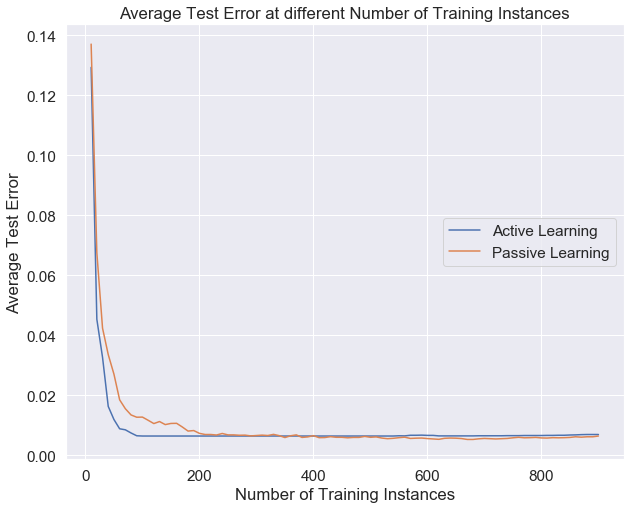

In [99]:
plt.figure(figsize=(10,8))
plt.plot(active_average_dt.transpose(), label='Active Learning')
plt.plot(passive_average_dt.transpose(), label='Passive Learning')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Average Test Error at different Number of Training Instances')
plt.legend(loc='right')
plt.show()

## According to the plot I draw above, both two kinds of learning method have the test error drop dramatically at first around 60 Training instances, the Active training drop quicker then the Passive one, after the dropping, Active training stay the very flat rate around 0.0064. The Passive training do slightly better than Active learning after 400 Training Instances, but the difference is very little.